In [5]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("Q1_Sales_Data - Q1_Sales_Data.csv.csv")
# df = pd.read_excel('Q1_Sales_Data.xlsx')

df.to_csv("Q1_Sales_Data.csv")

# Preview the first few rows
df.shape

(505, 7)

In [6]:
# Check missing values
df.isna().sum()
# df.dtypes

Date           0
Product        0
Region         0
CustomerID     0
Quantity       0
Sales         15
Revenue       15
dtype: int64

In [7]:
# Handle missing values
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())  # Fill missing values with the mean of the column
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].mean())  # Fill missing values with the mean of the column

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Remove duplicates
df.drop_duplicates(inplace=True)


In [8]:
df

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
0,2025-02-16,Printer,East,CUST0065,8,146.770000,1174.16,2,2025
1,2025-03-28,Monitor,South,CUST0032,3,587.170000,1761.51,3,2025
2,2025-03-27,Keyboard,East,CUST0034,2,738.150000,1476.30,3,2025
3,2025-01-02,Printer,West,CUST0092,1,883.870000,883.87,1,2025
4,2025-01-17,Tablet,North,CUST0095,3,742.680000,2228.04,1,2025
...,...,...,...,...,...,...,...,...,...
495,2025-02-11,Mouse,East,CUST0029,3,551.856755,494.64,2,2025
496,2025-01-16,Laptop,North,CUST0049,6,164.130000,984.78,1,2025
497,2025-01-19,Monitor,North,CUST0045,9,110.900000,998.10,1,2025
498,2025-02-14,Smartphone,West,CUST0093,6,960.850000,5765.10,2,2025


In [9]:
df.isna().sum()
df.dtypes

Date          datetime64[ns]
Product               object
Region                object
CustomerID            object
Quantity               int64
Sales                float64
Revenue              float64
Month                  int32
Year                   int32
dtype: object

In [ ]:
# Summary statistics for numerical columns
summary_stats = df[['Sales', 'Revenue', 'Quantity']].describe()
summary_stats

# df.describe()

,Sales,Revenue,Quantity
count,500.000000,500.000000,500.000000
mean,552.066123,2707.030037,4.938000
std,258.148739,2038.426310,2.663145
min,104.450000,104.450000,1.000000
25%,321.575000,1045.642500,2.000000
50%,551.856755,2179.015000,5.000000
75%,760.877500,3895.937500,7.000000
max,999.470000,8995.230000,9.000000


In [11]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Revenue', 'Quantity']].corr()

correlation_matrix

,Sales,Revenue,Quantity
Sales,1.000000,0.581817,-0.052218
Revenue,0.581817,1.000000,0.683675
Quantity,-0.052218,0.683675,1.000000


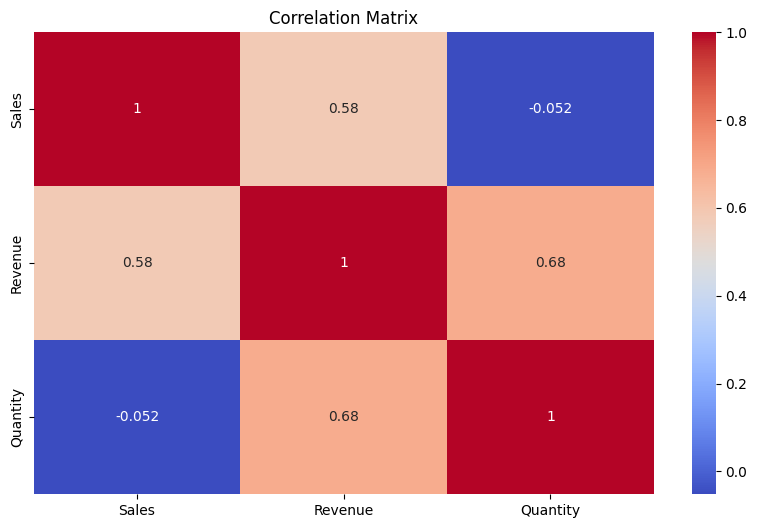

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Top 5 products by revenue
top_products = df.groupby('Product')['Revenue'].sum().nlargest(5)

top_products

Product
Laptop        239749.935714
Monitor       226049.975714
Printer       195526.607143
Tablet        191228.170000
Smartphone    181344.541429
Name: Revenue, dtype: float64

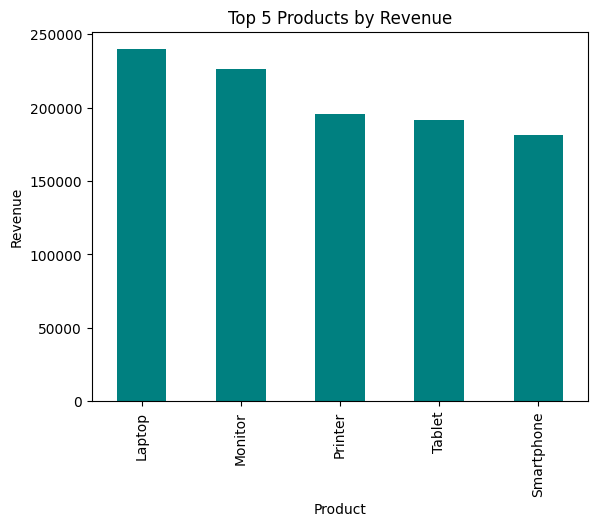

In [14]:
# Plot the bar chart
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

In [15]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales

Month
1    98673.220265
2    80320.823776
3    97039.017286
Name: Sales, dtype: float64

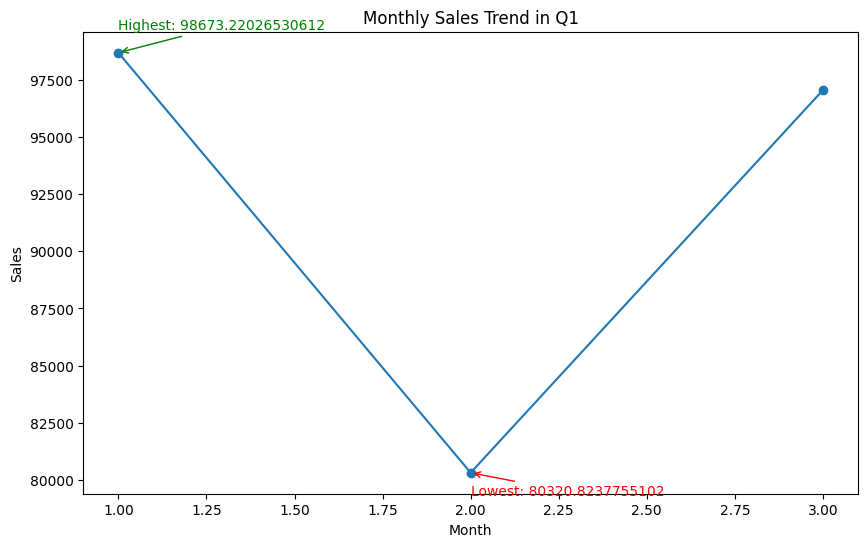

In [16]:
# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend in Q1')
plt.xlabel('Month')
plt.ylabel('Sales')

# Annotate highest and lowest months
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()


plt.annotate(
            f'Highest: {monthly_sales[max_month]}', 
            xy=(max_month, monthly_sales[max_month]), 
            xytext=(max_month, monthly_sales[max_month] + 1000),
            arrowprops=dict(arrowstyle='->', color='green'), 
            # arrowprops={'arrowstyle': '->', 'color': 'green'}, 
            color='green')
plt.annotate(
            f'Lowest: {monthly_sales[min_month]}', 
            xy=(min_month, monthly_sales[min_month]), 
            xytext=(min_month, monthly_sales[min_month] - 1000),
            arrowprops=dict(arrowstyle='->', color='red'), 
            color='red')

plt.show()

In [17]:
# Sales by region
region_sales = df.groupby('Region')['Revenue'].sum()

region_sales

Region
East     302183.095714
North    431113.305714
South    320457.624286
West     299760.992857
Name: Revenue, dtype: float64

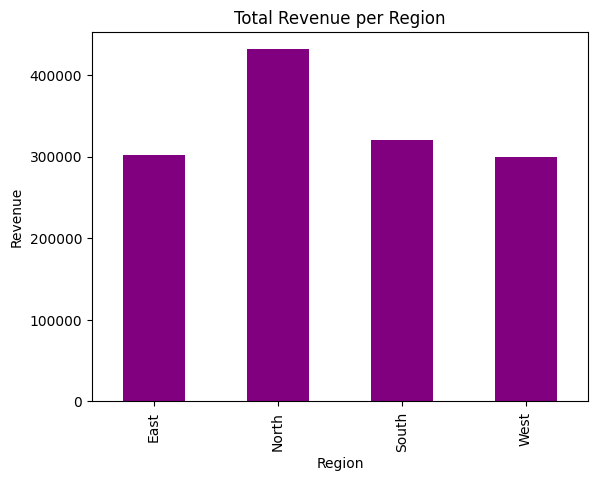

The region with the highest sales is North with a revenue of 431113.3057142857.


In [18]:
# Plot the bar chart
region_sales.plot(kind='bar', color='purple')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

# Identify region with highest sales growth
growth_region = region_sales.idxmax()
growth_value = region_sales.max()
print(f'The region with the highest sales is {growth_region} with a revenue of {growth_value}.')

In [19]:
df

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
0,2025-02-16,Printer,East,CUST0065,8,146.770000,1174.16,2,2025
1,2025-03-28,Monitor,South,CUST0032,3,587.170000,1761.51,3,2025
2,2025-03-27,Keyboard,East,CUST0034,2,738.150000,1476.30,3,2025
3,2025-01-02,Printer,West,CUST0092,1,883.870000,883.87,1,2025
4,2025-01-17,Tablet,North,CUST0095,3,742.680000,2228.04,1,2025
...,...,...,...,...,...,...,...,...,...
495,2025-02-11,Mouse,East,CUST0029,3,551.856755,494.64,2,2025
496,2025-01-16,Laptop,North,CUST0049,6,164.130000,984.78,1,2025
497,2025-01-19,Monitor,North,CUST0045,9,110.900000,998.10,1,2025
498,2025-02-14,Smartphone,West,CUST0093,6,960.850000,5765.10,2,2025


In [20]:
# Customer Behavior Classification
customer_data = df.groupby('CustomerID').agg({
    'Sales': 'count',
    'Revenue': 'mean'
}).rename(columns={'Sales': 'PurchaseFrequency', 'Revenue': 'AvgOrderValue'})

customer_data

,PurchaseFrequency,AvgOrderValue
CustomerID,,
CUST0001,7,2485.520000
CUST0002,5,2032.668000
CUST0003,4,3560.957143
CUST0004,6,2716.118333
CUST0005,10,2124.542000
...,...,...
CUST0096,2,2183.605000
CUST0097,8,3924.928750
CUST0098,4,2202.885000


In [21]:
# Mannual classification
def classify_customer(row):
    if row['AvgOrderValue'] >= 500 and row['PurchaseFrequency'] >= 5:
        return 'High Value'
    elif row['AvgOrderValue'] >= 200:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply the function to classify customers
customer_data['Category'] = customer_data.apply(classify_customer, axis=1)

customer_data

# Count the number of customers in each category
category_counts = customer_data['Category'].value_counts()

category_counts

Category
High Value      51
Medium Value    48
Name: count, dtype: int64

In [22]:
customer_data

,PurchaseFrequency,AvgOrderValue,Category
CustomerID,,,
CUST0001,7,2485.520000,High Value
CUST0002,5,2032.668000,High Value
CUST0003,4,3560.957143,Medium Value
CUST0004,6,2716.118333,High Value
CUST0005,10,2124.542000,High Value
...,...,...,...
CUST0096,2,2183.605000,Medium Value
CUST0097,8,3924.928750,High Value
CUST0098,4,2202.885000,Medium Value


High Value customers: 51
Medium Value customers: 48


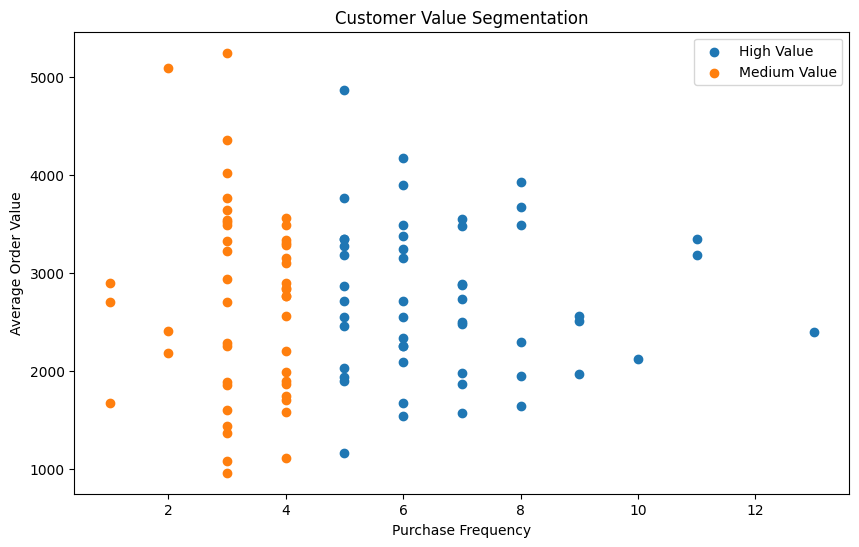

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))

for label, group in customer_data.groupby('Category'):
    print(f'{label} customers: {len(group)}')
    plt.scatter(group['PurchaseFrequency'], group['AvgOrderValue'], label=label)

plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.title('Customer Value Segmentation')
plt.legend()
plt.show()

# customer_data.groupby("Category")["AvgOrderValue"].sum()